<h1>词云</h1>

In [1]:
from snownlp import SnowNLP
import csv
import numpy as np
import wordcloud
import matplotlib.pyplot as plt
import re
import jieba
import jieba.posseg as pseg

In [2]:
comments_list = list(item[3:] for item in csv.reader(open("scene_comment_.csv",encoding="utf-8")))
with open("scene_.csv",encoding="utf-8") as f:
    reader = csv.reader(f)
    scener = list(reader)[1:]
def filter(item):
    return item[:2]
scene = list(map(filter,scener))
place_dict = dict(scene)

In [3]:
def _(item,place_id):
    if item[1] == place_id:
        return item[0]
    else:
        return None

def filter():
    result = dict()
    for id in place_dict.keys():
        lister = list()
        for item in comments_list:
            if _(item,id):
                lister.append(_(item,id))
        result[id] = lister
    return result

comments_dict = filter()

In [4]:
strg = (i for i in comments_dict.values())
strfull = ''
for group in strg:
    for comment in group:
        strfull += comment

strfull = re.sub('[，。、“”‘ ’\(\)的了去在有就是到成都还也很但多可以和一个我地方]','',str(strfull))
#strfull = ' '.join(jieba.lcut(strfull))
#print(strfull[:500],'...')

In [5]:
#WC = wordcloud.WordCloud(font_path = 'C:\\Windows\\Fonts\\STFANGSO.TTF',max_words=2000,height= 1000,width=1000,background_color='white',repeat=False,mode='RGBA')
#con = WC.generate(strfull)
#WC.to_file("res.png")

In [6]:
jieba.enable_paddle() #启动paddle模式。 0.40版之后开始支持，早期版本不支持
words = pseg.cut(strfull,use_paddle=True) #paddle模式

Paddle enabled successfully......


In [7]:
a = list(words)

In [8]:
new = [list(pair) for pair in a]

In [9]:
remain_list = ["n","nr","nz","a","ns"]
new_list = []
for item,index in zip(new,range(len(new))):
    if item[1] in remain_list and item[0] != "人":
         new_list.append(item)

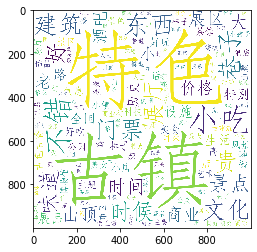

In [12]:
strf = " ".join([item[0] for item in new_list])
WC = wordcloud.WordCloud(font_path = 'C:\\Windows\\Fonts\\STFANGSO.TTF',max_words=150,height= 1000,width=1000,background_color='white',repeat=False,mode='RGBA')
con = WC.generate(strf)
WC.to_file("res.png")
plt.imshow(con)